**Autor: Pablo Velasquez**

# Modelos supervisados Prediccion de precio Bitcoin


El mercado de las criptomonedas ha experimentado un crecimiento significativo en los últimos años, y Bitcoin ha sido una de las criptomonedas más destacadas en este mercado. Con su creciente popularidad, hay un interés creciente en comprender los factores que afectan su precio. En este sentido, el análisis del precio de Bitcoin y los factores que lo influyen se ha convertido en un tema de gran interés para la comunidad académica y empresarial.

El uso de técnicas de análisis machine learning ha demostrado ser útil en la predicción de los precios de activos financieros y ha sido aplicado con éxito en el análisis de las fluctuaciones del precio de Bitcoin.

La creación de modelos utilizando machine learning es importante porque permite tomar decisiones basadas en datos, automatizar tareas complejas, mejorar la precisión y la eficacia, descubrir información oculta, optimizar procesos y recursos, y fomentar la innovación y el avance tecnológico en numerosos ámbitos.

**El objetivo de este estudio es aplicar técnicas de análisis machine learning, conocer los diferentes modelos de regresiones que posee Scikit Learn para examinar los factores que influyen en el precio de Bitcoin.**


# Obteniendo Data

Excel **"df_btc_factores.xlsx"** contiene datos macroeconomicos que seran analizados y como ellos impactan el precio de Bitcoin.

|Ticker/ Acronimo|Nombre|Descripción|
|:---|:---|:---|
|*SPY*| Standard and poors| Precio de la accion del indice de las empresas mas grandes de USA|
|*DJI*|Down Jones|Precio de la accion del indice industrial |
|*IXIC*|Nasdaq|Precio de National Association of Securities Dealers Automated Quotation|
|*GOLD*|Oro|Precio del oro|
|*DXY*|Dolar index|Medida del valor del dólar estadounidense en relación con una cesta de monedas extranjeras|
|*IR_TLT_10YR*|Bonos del tesoro 10 años|Tasas de interes de los bonos 10 años|
|*C_SENT*|Consumer Sentiment|es una expresión agregada de actitudes, sentimientos, valores, motivaciones y comportamientos de las personas dentro de un mercado en particular.|
|*CPI*|Consumer price index|Es una medida del cambio promedio a lo largo del tiempo en los precios que pagan los consumidores urbanos por una canasta básica de bienes y servicios de consumo.|
|*UNEM_RATE*|Unemployment rate|El porcentaje de personas en la fuerza laboral que están desempleadas |
|*HASH_RATE_THs*|Hash Rate |Es una medida de la potencia computacional por segundo utilizada al minar |
|*BTC* |Bitcoin |Precio de Bitcoin |




In [1]:
from pathlib import Path # libreria que ayuda a obtener la ruta de archivos
import pandas as pd 
import numpy as np

df_path=Path('./df_btc_factores.xlsx')
df=pd.read_excel(df_path,index_col='Date')


# Exploración de los datos

La exploración de datos es una etapa fundamental en el proceso de análisis y comprensión de conjuntos de datos. Consiste en examinar detalladamente los datos disponibles para descubrir patrones, tendencias, relaciones y posibles inconsistencias o valores atípicos.

Durante la exploración de datos, se utilizan diversas técnicas y herramientas para obtener una visión general de la estructura y características del conjunto de datos. Esto puede incluir la revisión de estadísticas descriptivas, como promedios, desviaciones estándar y rangos, así como la visualización de los datos a través de gráficos, histogramas, diagramas de dispersión, entre otros.

La exploración de datos también implica la identificación y manejo de valores faltantes o nulos, así como la detección de datos atípicos o inconsistentes que podrían afectar la calidad del análisis posterior.

Además, la exploración de datos permite la generación de hipótesis iniciales sobre las relaciones entre las variables y posibles preguntas de investigación que pueden ser respondidas mediante análisis más profundos.

La exploración de datos es un proceso esencial que permite comprender la estructura, características y posibles relaciones dentro de un conjunto de datos. Al explorar y familiarizarse con los datos, los analistas pueden obtener información valiosa que los ayuda a tomar decisiones más fundamentadas y realizar análisis más precisos.


In [2]:
# ver las primero 5 filas de la tabla 
df.head(5) 


,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,UNEM_RATE,HASH_RATE_THs,BTC
Date,,,,,,,,,,,
2014-12-01,2028.18,17823.07,4736.049805,1206.00,94.80,2.21,93.6,1.6,5.6,0.335365,320.192993
2015-01-01,2082.20,17164.95,4635.240234,1260.25,95.32,1.88,98.1,1.6,5.7,0.348787,217.464005
2015-02-01,2079.99,18132.70,4963.529785,1214.00,98.36,1.98,95.4,1.7,5.5,0.313294,254.263000
2015-03-01,2094.86,17776.12,4900.879883,1187.00,94.60,2.04,93.0,1.8,5.4,0.329773,244.223999
2015-04-01,2111.94,17840.52,4941.419922,1180.25,96.91,1.94,95.9,1.8,5.4,0.347910,236.145004


In [3]:
# ver las ultimas 5 filas de la tabla
df.tail(5)

,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,UNEM_RATE,HASH_RATE_THs,BTC
Date,,,,,,,,,,,
2022-12-01,3960.66,33147.25,10466.480469,1813.75,102.10,3.87,59.7,5.7,3.5,274.241331,16547.496094
2023-01-01,4079.68,34086.04,11584.549805,1923.90,104.95,3.53,64.9,5.6,3.4,224.956785,23139.283203
2023-02-01,3956.00,32656.70,11455.540039,1824.60,103.90,3.91,67.0,5.5,3.6,293.209894,23147.353516
2023-03-01,4151.28,33274.15,12221.910000,1969.00,102.51,3.49,62.0,5.0,3.5,328.332326,28478.486500
2023-04-01,4169.48,34098.16,12226.580000,1990.10,101.67,3.45,63.5,4.9,3.5,358.383011,29268.814500


In [4]:
# informacion sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2014-12-01 to 2023-04-01
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SPY            101 non-null    float64
 1   DJI            101 non-null    float64
 2   IXIC           101 non-null    float64
 3   GOLD           101 non-null    float64
 4   DXY            101 non-null    float64
 5   IR_TLT_10YR    101 non-null    float64
 6   C_SENT         101 non-null    float64
 7   CPI            101 non-null    float64
 8   UNEM_RATE      101 non-null    float64
 9   HASH_RATE_THs  101 non-null    float64
 10  BTC            101 non-null    float64
dtypes: float64(11)
memory usage: 9.5 KB


In [5]:
# forma de la data
df.shape

(101, 11)

In [6]:
# codido extra - guarda imagenes en alta resolucion PNGs

IMAGES_PATH = Path() / "images" / "Factores_BTC"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
# muestra descripcion estadistica de la data 
df.describe()


,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,UNEM_RATE,HASH_RATE_THs,BTC
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3034.161881,25565.260000,8651.972775,1478.407426,96.979703,2.144950,85.934653,2.793069,4.849505,84.718870,13734.237749
std,827.461366,6040.375107,3331.336210,283.332521,4.434593,0.783838,13.967465,1.564497,1.845190,91.668131,16090.453750
min,1904.420000,16284.700000,4557.950195,1060.000000,89.130000,0.620000,50.000000,1.200000,3.400000,0.313294,217.464005
25%,2329.910000,19864.090000,5614.790039,1244.850000,94.120000,1.630000,76.800000,1.800000,3.700000,2.832475,970.403015
50%,2803.980000,25415.190000,7700.100098,1323.250000,96.350000,2.170000,91.700000,2.200000,4.400000,45.274966,7780.439941
75%,3883.430000,30775.430000,11468.000000,1763.150000,98.920000,2.680000,96.900000,2.400000,5.100000,141.468551,19784.726563
max,4674.770000,36338.300000,15644.969727,1990.100000,112.120000,3.980000,101.400000,6.600000,14.700000,358.383011,61318.957031


Hasta este momento **no** se observan datos nulos y no se observan datos faltantes.


## Buscando datos faltantes

In [8]:
#Verificando la cantidad de datos nulos
df.isnull().sum()

SPY              0
DJI              0
IXIC             0
GOLD             0
DXY              0
IR_TLT_10YR      0
C_SENT           0
CPI              0
UNEM_RATE        0
HASH_RATE_THs    0
BTC              0
dtype: int64

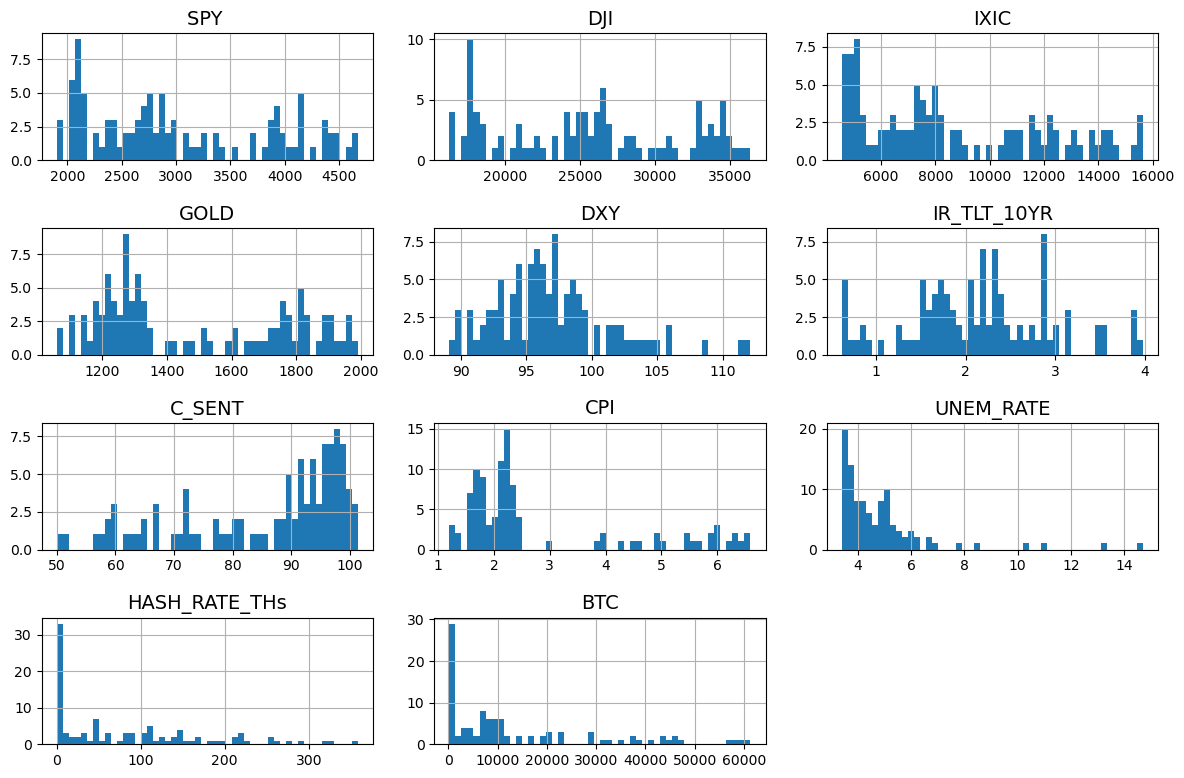

In [9]:
import matplotlib.pyplot as plt

# codigo extra para definir el tamaño de letra y titulos 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code para guardar imagen 
plt.show()

Podemos observar que existen diferentes escalas en los diferentes atributos, muchos de los histogramas estan sesgados a la derecha y la media a la izquierda, se necesitara transformar los atributos para tener distribuciones mas simetricas esto ayuda a los modelos de aprendizaje y logren detectar patrones.

## Buscando correlaciones


La correlación de Pearson es una medida estadística que nos ayuda a entender si existe una relación lineal entre dos variables. En términos sencillos, nos muestra si los valores de dos variables tienden a moverse juntos en la misma dirección (correlación positiva) o si se mueven en direcciones opuestas (correlación negativa).

La correlación de Pearson se representa con un valor que va desde -1 hasta 1. Un valor de 1 indica una correlación positiva perfecta, lo que significa que cuando una variable aumenta, la otra variable también lo hace de manera proporcional. Por otro lado, un valor de -1 indica una correlación negativa perfecta, lo que significa que cuando una variable aumenta, la otra variable disminuye de manera proporcional. Un valor de 0 indica que no hay correlación lineal entre las variables.

La interpretación de la correlación de Pearson es la siguiente:

    Si el valor de correlación está cercano a 1, significa que hay una fuerte correlación positiva. Esto nos dice que cuando una variable aumenta, la otra variable tiende a aumentar también.

    Si el valor de correlación está cercano a -1, significa que hay una fuerte correlación negativa. Esto nos dice que cuando una variable aumenta, la otra variable tiende a disminuir.

    Si el valor de correlación está cercano a 0, significa que no hay una relación lineal clara entre las variables.

Es importante tener en cuenta que la correlación de Pearson solo mide la relación lineal entre variables y no captura relaciones no lineales o causales. Además, es posible que exista una relación no lineal entre las variables, pero la correlación de Pearson no lo detectará.



In [10]:
corr_matriz=df.corr()

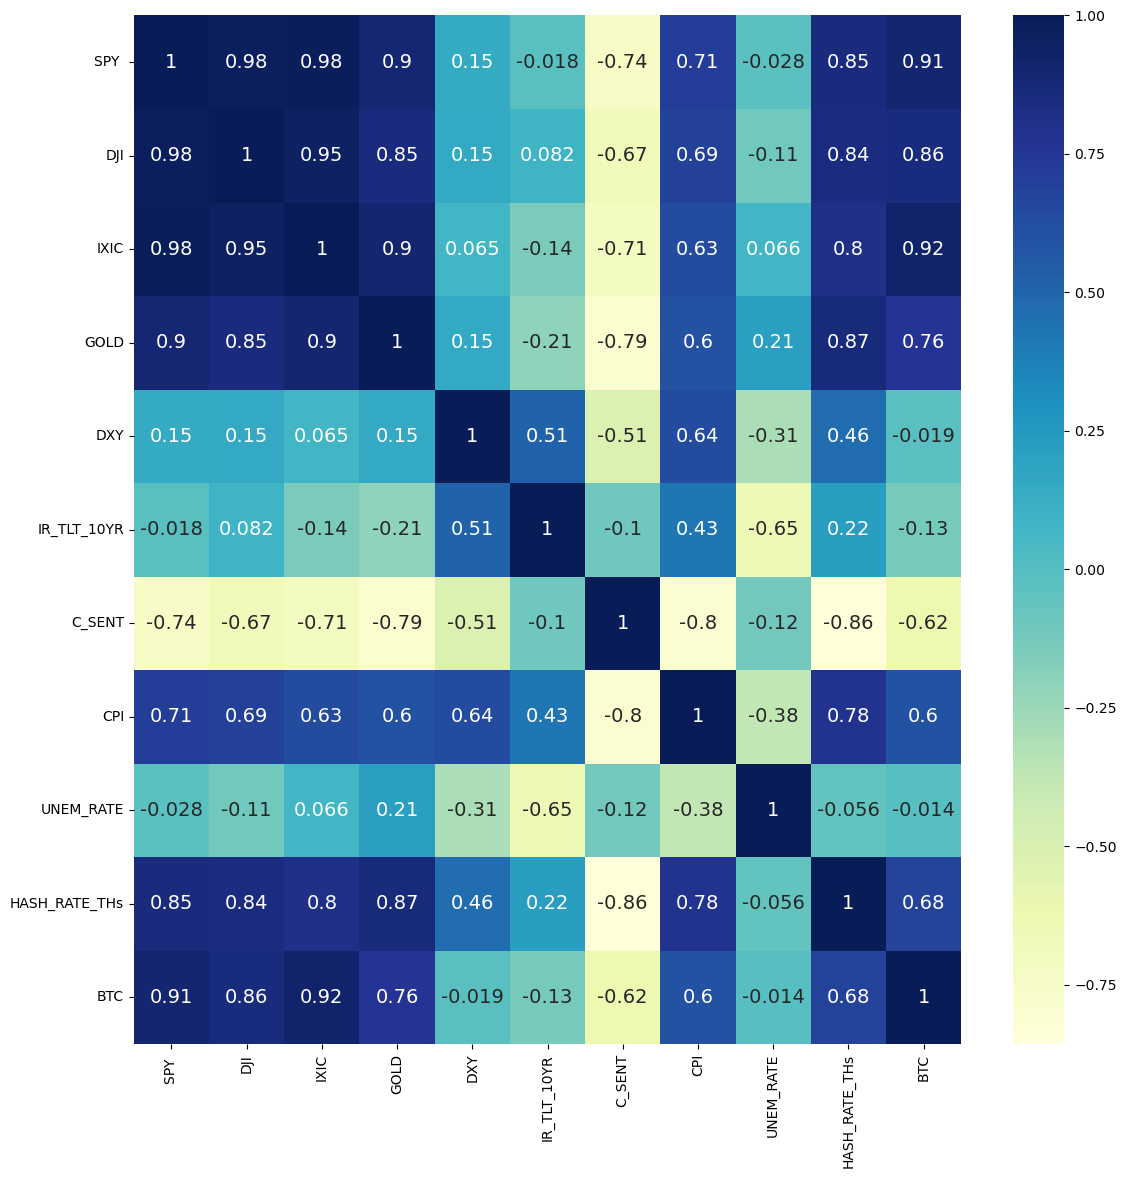

In [11]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr_matriz,xticklabels=corr_matriz.columns,
            yticklabels=corr_matriz.columns,annot=True,cmap='YlGnBu');
save_fig("Heatmap_correlacion_sns") 

**Correlacion con Bitcoin (label o etiqueta a predecir)**

In [12]:
corr_matriz['BTC'].sort_values(ascending=False)

BTC              1.000000
IXIC             0.922147
SPY              0.906133
DJI              0.855918
GOLD             0.763246
HASH_RATE_THs    0.683514
CPI              0.595982
UNEM_RATE       -0.014316
DXY             -0.019068
IR_TLT_10YR     -0.128781
C_SENT          -0.619496
Name: BTC, dtype: float64

**Analicemos algunas de las variables con respecto a Bitcoin.**

Un coeficiente de correlación de 0.922 entre IXIC (NASDAQ Composite Index) y BTC sugiere una fuerte correlación positiva. Esto significa que hay una relación positiva y estrecha entre los movimientos de BTC y el índice NASDAQ Composite. Cuando BTC sube o baja, es probable que el NASDAQ Composite Index también muestre movimientos similares en la misma dirección.

Un coeficiente de correlación de -0.0143 entre UNEM_RATE (Tasa de desempleo) y BTC sugiere una correlación muy débil o prácticamente inexistente entre estos dos indicadores. Los movimientos de precios de BTC parecen no estar relacionados con la tasa de desempleo.


Un coeficiente de correlación de -0.619 entre C_SENT (Índice de Sentimiento del Consumidor) y BTC indica una correlación negativa significativa. Esto implica que puede haber una relación inversa entre el sentimiento del consumidor y los movimientos de precios de BTC. Cuando el sentimiento del consumidor es negativo, los precios de BTC tienden a mostrar movimientos positivos y viceversa.

**Recuerda que el coeficiente de correlación proporciona una medida estadística de la relación entre dos variables, pero no implica causalidad. Estas interpretaciones son basadas en los valores de correlación proporcionados y pueden cambiar con el tiempo a medida que los datos se actualicen.**

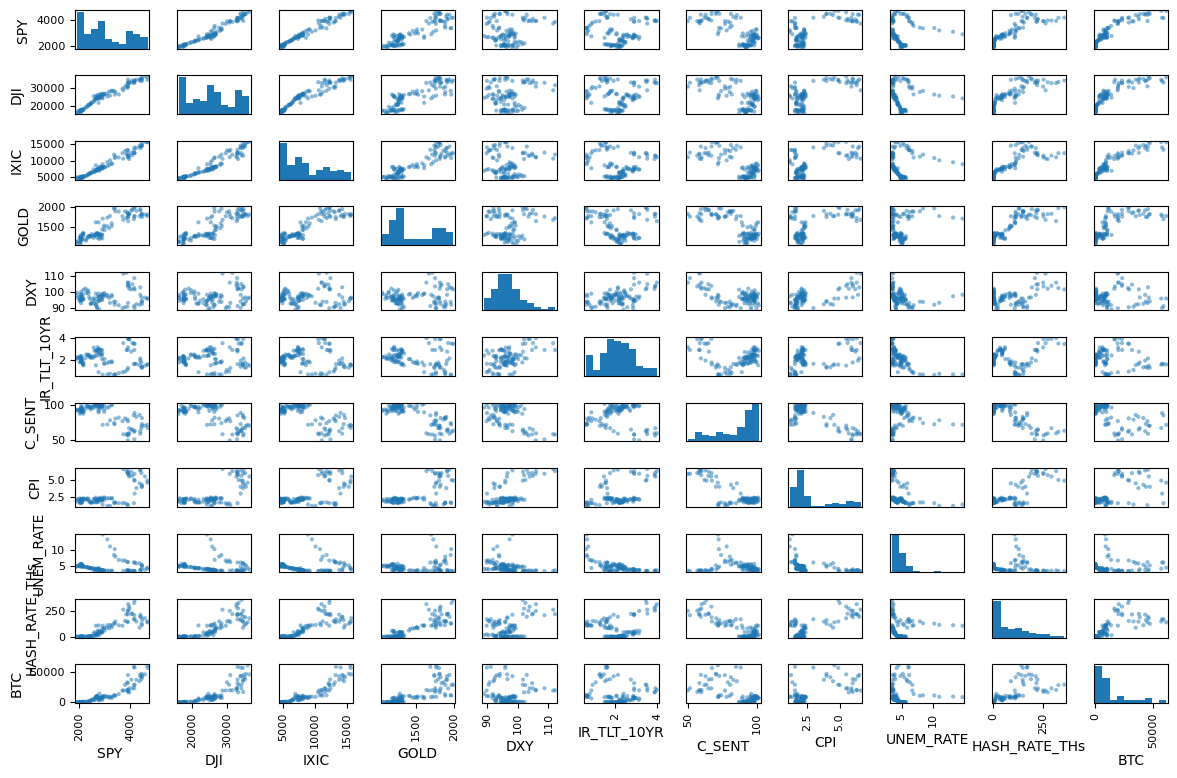

In [13]:
from pandas.plotting import scatter_matrix

attributes = df.columns # guardar el nombre de las columnas en variable attributes

plt.rc('axes', labelsize=10, titlesize=14) # Cambiando el tamaño del texo en los ejes
scatter_matrix(df[attributes] ,figsize=(12, 8)) # Metodo para visualizar df
save_fig("scatter_matrix_plot")  # extra code para guardar imagen
plt.show()

# Preparando la data

Observamos que unemployment rate no posee correlacion con Bitcoin, se eliminara de la tabla de datos **df**



In [14]:
df=df.drop('UNEM_RATE',axis=1)
df

,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,HASH_RATE_THs,BTC
Date,,,,,,,,,,
2014-12-01,2028.18,17823.07,4736.049805,1206.00,94.80,2.21,93.6,1.6,0.335365,320.192993
2015-01-01,2082.20,17164.95,4635.240234,1260.25,95.32,1.88,98.1,1.6,0.348787,217.464005
2015-02-01,2079.99,18132.70,4963.529785,1214.00,98.36,1.98,95.4,1.7,0.313294,254.263000
2015-03-01,2094.86,17776.12,4900.879883,1187.00,94.60,2.04,93.0,1.8,0.329773,244.223999
2015-04-01,2111.94,17840.52,4941.419922,1180.25,96.91,1.94,95.9,1.8,0.347910,236.145004
...,...,...,...,...,...,...,...,...,...,...
2022-12-01,3960.66,33147.25,10466.480469,1813.75,102.10,3.87,59.7,5.7,274.241331,16547.496094
2023-01-01,4079.68,34086.04,11584.549805,1923.90,104.95,3.53,64.9,5.6,224.956785,23139.283203
2023-02-01,3956.00,32656.70,11455.540039,1824.60,103.90,3.91,67.0,5.5,293.209894,23147.353516


## Creando Dataframe variables para predecir el siguiente valor de Bitcoin.

Crearemos un dataframe con las variables necesarias que se usaran por el modelo que sera entrenado y que ha sido puesto a prueba, train-test sets.
veremos si los modelos son optimistas o pesimistas para predecil el precio de bitcoin para el siguiente mes.


In [15]:
import pandas as pd
datos_nuevos={
        'SPY ': [4205.45],
        'DJI': [33093.34],
        'IXIC': [12975.69],
        'GOLD': [1944.1],
        'DXY': [104.21],
        'IR_TLT_10YR': [3.81],
        'C_SENT': [59.2],
        'CPI': [4.9],
        'HASH_RATE_THs': [394.100656]}
index= pd.DatetimeIndex(['2023-05-01'])
datos_nuevos_df=pd.DataFrame(datos_nuevos,index=index)
datos_nuevos_df

,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,HASH_RATE_THs
2023-05-01,4205.45,33093.34,12975.69,1944.1,104.21,3.81,59.2,4.9,394.100656


In [16]:
datos_nuevos_df.shape

(1, 9)

In [17]:
btc_nuevo=26719.2954
btc_nuevo

26719.2954

## Creando train-test set

Se crea un conjunto de entrenamiento (train set) y un conjunto de prueba (test set) con el fin de evaluar y validar la capacidad de generalización de un modelo de machine learning. 
Evaluación de rendimiento,Detección de sobreajuste (overfitting),Ajuste de hiperparámetros,Validación cruzada (cross-validation).

se crea un conjunto de entrenamiento y prueba para evaluar el rendimiento del modelo en datos no vistos, detectar sobreajuste, ajustar los hiperparámetros y realizar validación cruzada. Estas prácticas ayudan a asegurar que el modelo tenga una capacidad de generalización adecuada y sea confiable para su uso en situaciones del mundo real.

In [18]:
# Separando la data en datos de entrenamiento (train) y datos prueba(test).
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(df,test_size=0.05,
                                    random_state=502,
                                   shuffle=True) # shuffle default is true

Los datos de train set y test set estan en forma aleatoria 

In [19]:
train_set.head(5)

,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,HASH_RATE_THs,BTC
Date,,,,,,,,,,
2015-03-01,2094.86,17776.12,4900.879883,1187.0,94.60,2.04,93.0,1.8,0.329773,244.223999
2017-09-01,2557.00,22405.09,6495.959961,1283.1,94.55,2.20,95.1,1.7,7.569349,4338.709961
2020-07-01,3391.71,26428.32,10745.269531,1964.9,92.14,0.62,72.5,1.6,128.137015,11323.466797
2017-05-01,2433.99,21008.65,6198.520020,1266.2,95.63,2.30,97.1,1.7,4.858244,2286.409912
2019-06-01,2996.11,26599.96,8006.240234,1409.0,98.52,2.07,98.2,2.1,59.954384,10817.155273


In [20]:
train_set.shape

(95, 10)

In [21]:
test_set.head(5)

,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,HASH_RATE_THs,BTC
Date,,,,,,,,,,
2018-03-01,2653.63,24103.11,7063.450195,1323.85,91.84,2.84,101.4,2.1,22.031861,6973.529785
2020-06-01,3207.62,25812.88,10058.769531,1768.10,93.35,0.73,78.1,1.2,115.344676,9137.993164
2015-07-01,2039.87,17689.86,5128.279785,1098.40,95.82,2.32,93.1,1.8,0.361229,284.649994
2020-01-01,3277.31,28256.03,9150.940430,1584.20,98.13,1.76,99.8,2.3,110.710649,9350.529297
2020-12-01,3793.75,30606.48,12888.280273,1887.60,90.58,0.93,80.7,1.6,153.482070,29001.720703


In [22]:
test_set.shape

(6, 10)

La division de la data train y test posee tanto los atributos (X) como las etiquetas (y).
Separaremos los datos en atributos y etiquetas, (X,y)

## Creando Pipeline

La creación de pipelines en machine learning permite organizar, automatizar, modularizar y documentar el flujo de trabajo de un proyecto. Esto facilita la reproducción de resultados, fomenta la reutilización de componentes, automatiza tareas repetitivas y simplifica la gestión de versiones y cambios en el proyecto. Los pipelines son una herramienta poderosa para mejorar la eficiencia y la calidad en el desarrollo de modelos de machine learning.


In [23]:
from sklearn.preprocessing import FunctionTransformer #crear funciones
from sklearn.pipeline import make_pipeline # crear pipeline usa el prefijo pipeline en cada columna ver dataframe adelante
from sklearn.preprocessing import StandardScaler # Estandariza la data

log_pipeline = make_pipeline(
    FunctionTransformer(np.log,inverse_func=np.exp,# transforma la data aplicando logaritmo
                        feature_names_out="one-to-one"),# one to one regresa el nombre de la columna
    StandardScaler()) # estandariza la data por la varianza
log_pipeline

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<ufunc 'log'>,
                                     inverse_func=<ufunc 'exp'>)),
                ('standardscaler', StandardScaler())])

Se utiliza StandardScaler de Scikit-learn para estandarizar las características numéricas en el aprendizaje automático. Esto ayuda a normalizar las características, evitar sesgos, mejorar la convergencia de los algoritmos, facilitar la interpretación del modelo y garantizar una contribución equilibrada de todas las características.

In [24]:
from sklearn.compose import make_column_selector,make_column_transformer # transformar columnas y seleccion de columnas

preproceso=make_column_transformer(
    (log_pipeline,
     make_column_selector(dtype_include=np.number) # aplica log pipeline a las columnas que sean numericas   
))
preproceso

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>,
                                                                      inverse_func=<ufunc 'exp'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e1033d30>)])

Veamos en un Dataframe como transforma los datos.



In [25]:

train_set_prep=preproceso.fit_transform(train_set)

df_train=pd.DataFrame(train_set_prep,
                      columns=preproceso.get_feature_names_out(), #coloca pipeline antes de titulo de cada columna
                      index=train_set.index)
df_train.head()

,pipeline__SPY,pipeline__DJI,pipeline__IXIC,pipeline__GOLD,pipeline__DXY,pipeline__IR_TLT_10YR,pipeline__C_SENT,pipeline__CPI,pipeline__HASH_RATE_THs,pipeline__BTC
Date,,,,,,,,,,
2015-03-01,-1.236779,-1.374458,-1.291687,-1.069147,-0.578739,0.039108,0.541710,-0.726970,-1.858172,-1.736815
2017-09-01,-0.502773,-0.428014,-0.557792,-0.654927,-0.590553,0.219703,0.664257,-0.849357,-0.469811,-0.082085
2020-07-01,0.537401,0.247360,0.753080,1.612577,-1.167506,-2.809420,-0.824902,-0.979166,0.783648,0.469617
2017-05-01,-0.684307,-0.691190,-0.679871,-0.725474,-0.336757,0.326020,0.778478,-0.849357,-0.666284,-0.450497
2019-06-01,0.080757,0.273833,-0.013318,-0.156899,0.328536,0.074025,0.840301,-0.396904,0.447125,0.443309


# Preparar la data para algoritmos Machine Learning

El segmento train y test posee tanto los atributos como las etiquetas, las variables X y el valor esperado (BTC).
por lo que separamos la data en (X,y) tanto del train set como del test set

In [26]:
X_train= train_set.drop("BTC", axis=1)
y_train = train_set["BTC"].copy()

In [27]:
X_train.head()

,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,HASH_RATE_THs
Date,,,,,,,,,
2015-03-01,2094.86,17776.12,4900.879883,1187.0,94.60,2.04,93.0,1.8,0.329773
2017-09-01,2557.00,22405.09,6495.959961,1283.1,94.55,2.20,95.1,1.7,7.569349
2020-07-01,3391.71,26428.32,10745.269531,1964.9,92.14,0.62,72.5,1.6,128.137015
2017-05-01,2433.99,21008.65,6198.520020,1266.2,95.63,2.30,97.1,1.7,4.858244
2019-06-01,2996.11,26599.96,8006.240234,1409.0,98.52,2.07,98.2,2.1,59.954384


In [28]:
y_train

Date
2015-03-01      244.223999
2017-09-01     4338.709961
2020-07-01    11323.466797
2017-05-01     2286.409912
2019-06-01    10817.155273
                  ...     
2016-08-01      575.471985
2022-01-01    38483.125000
2021-05-01    37332.855469
2020-04-01     8658.553711
2016-07-01      624.681030
Name: BTC, Length: 95, dtype: float64

In [29]:
X_train.shape

(95, 9)

In [30]:
y_train.shape

(95,)

Del mismo modo separamos en atributos y etiquetas (X,y) para el test set

In [31]:
X_test= test_set.drop("BTC", axis=1)
y_test = test_set["BTC"].copy()

In [32]:
X_test.head()

,SPY,DJI,IXIC,GOLD,DXY,IR_TLT_10YR,C_SENT,CPI,HASH_RATE_THs
Date,,,,,,,,,
2018-03-01,2653.63,24103.11,7063.450195,1323.85,91.84,2.84,101.4,2.1,22.031861
2020-06-01,3207.62,25812.88,10058.769531,1768.10,93.35,0.73,78.1,1.2,115.344676
2015-07-01,2039.87,17689.86,5128.279785,1098.40,95.82,2.32,93.1,1.8,0.361229
2020-01-01,3277.31,28256.03,9150.940430,1584.20,98.13,1.76,99.8,2.3,110.710649
2020-12-01,3793.75,30606.48,12888.280273,1887.60,90.58,0.93,80.7,1.6,153.482070


In [33]:
y_test

Date
2018-03-01     6973.529785
2020-06-01     9137.993164
2015-07-01      284.649994
2020-01-01     9350.529297
2020-12-01    29001.720703
2017-08-01     4703.390137
Name: BTC, dtype: float64

In [34]:
X_test.shape

(6, 9)

In [35]:
y_test.shape

(6,)

# Machine Learning


## Linear Regression 

Crearemos un pipeline que transforma los datos antes de ingresar al modelo Linear Regressor

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

lin_reg_pipe=Pipeline([('prep',preproceso),
                       ('ln_reg',LinearRegression(n_jobs=-1))])
lin_reg_pipe.fit(X_train,y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e1033d30>)])),
                ('ln_reg', LinearRegression(n_jobs=-1))])

In [37]:
predictions=lin_reg_pipe.predict(X_test)
predictions

array([ 9284.8547441 , 14333.9571578 ,  5301.6491385 , 14083.45806058,
       31657.26543569,  6234.89140415])

In [38]:
lin_reg_df_pred=pd.DataFrame({'Predicciones':predictions,'y':y_test })
lin_reg_df_pred

,Predicciones,y
Date,,
2018-03-01,9284.854744,6973.529785
2020-06-01,14333.957158,9137.993164
2015-07-01,5301.649138,284.649994
2020-01-01,14083.458061,9350.529297
2020-12-01,31657.265436,29001.720703
2017-08-01,6234.891404,4703.390137


In [39]:
# Obtener los coeficientes de la regresion lineal
lin_reg_pipe.named_steps['ln_reg'].coef_

array([ 14162.2360716 , -14828.05499794,  23924.26760154,   -633.65246229,
        -2128.87280979,   2707.99584083,   2350.52356844,   2150.29469274,
        -8474.48153469])

In [40]:
# Obtener el intercepto de la regresion lineal
lin_reg_pipe.named_steps['ln_reg'].intercept_

13975.85473254733

In [41]:
lr_score_test=lin_reg_pipe.score(X_test,y_test)# equivalente a r2_score
lr_score_test

0.8191335230143514

In [42]:
lr_score_train=lin_reg_pipe.score(X_train,y_train)
lr_score_train

0.8959363882051471

EL modelo linear hizo un buen trabajo teniendo un coeficiente de determinacion (precision del modelo) de 0.89 (89%) para train set y 0.63 (63%) para test set.

In [43]:
from sklearn.metrics import mean_absolute_error

sc_mae=mean_absolute_error(y_test,predictions)
sc_mae

3574.0438101359327

In [44]:
linreg_pred_dn=lin_reg_pipe.predict(datos_nuevos_df)
linreg_pred_dn

array([32695.28596531])

In [45]:
linreg_dn_pred=pd.DataFrame({'predictions':linreg_pred_dn,'y':btc_nuevo },index=index)
linreg_dn_pred

,predictions,y
2023-05-01,32695.285965,26719.2954


El modelo lineal con precision baja 63% esta siendo optimista para la prediccion del precio de bitcoin para el proximo mes.

## SDG Stochastic Gradient Descent Regressor

El descenso de gradiente es un método iterativo para encontrar los parámetros óptimos de un modelo de aprendizaje automático al minimizar una función de pérdida. En el contexto de la regresión, el objetivo es encontrar una función que mapee las características de entrada a una variable de salida continua.

El SGD es llamado "estocástico" porque utiliza muestras aleatorias del conjunto de datos para calcular el gradiente de la función de pérdida en lugar de utilizar todo el conjunto de datos en cada iteración. Esto hace que el SGD sea más rápido y eficiente en conjuntos de datos grandes.



In [46]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

sgd_reg_pipe=Pipeline([('prep',preproceso),
                       ('sgd_reg',SGDRegressor(max_iter=10000,# numero de iteraciones
                                              tol=1e-5,# stop criterio cuando (loss>best_loss-tol)
                                              n_iter_no_change=25,# parar si no hay cambio en 25 iteraciones 
                                              random_state=502))])
sgd_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e1033d30>)])),
                ('sgd_reg',
                 SGDRegressor(max_iter=10000, n_iter_no_change=25,
                              random_state=502, tol=1e-05))])

In [47]:
sgd_pred=sgd_reg_pipe.predict(X_test)
sgd_pred

array([ 8738.15541144, 14141.61620806,  4832.29087121, 14207.55848172,
       31193.22584976,  6075.1210068 ])

In [48]:
sgd_reg_df_pred=pd.DataFrame({'predictions':sgd_pred,'y':y_test })
sgd_reg_df_pred

,predictions,y
Date,,
2018-03-01,8738.155411,6973.529785
2020-06-01,14141.616208,9137.993164
2015-07-01,4832.290871,284.649994
2020-01-01,14207.558482,9350.529297
2020-12-01,31193.225850,29001.720703
2017-08-01,6075.121007,4703.390137


In [49]:
# Obtener el intercepto de la regresion lineal
sgd_reg_pipe.named_steps['sgd_reg'].coef_

array([13523.42234451, -8708.07081711, 19222.88006949, -1058.41348668,
       -2073.35573108,  1515.00882447,  1651.03739106,  2199.32214908,
       -9527.07735434])

In [50]:
# Obtener el intercepto de la regresion lineal
sgd_reg_pipe.named_steps['sgd_reg'].intercept_

array([13975.62847267])

In [51]:
sgd_score_test=sgd_reg_pipe.score(X_test,y_test)
sgd_score_test

0.8397951116197793

In [52]:
sgd_score_train=sgd_reg_pipe.score(X_train,y_train)
sgd_score_train

0.8942058833846609

Stochastic Gradient Descent Regressor estimo un poco mejor que la regresion lineal, veamos si podemos mejorar el modelo.


In [53]:
sgd_pred_dn=sgd_reg_pipe.predict(datos_nuevos_df)
sgd_pred_dn

array([30811.84448016])

In [54]:
sgd_dn_pred=pd.DataFrame({'predictions':sgd_pred_dn,'y':btc_nuevo },index=index)
sgd_dn_pred

,predictions,y
2023-05-01,30811.84448,26719.2954


El modelo Stochastic con precision baja 66% esta siendo optimista para la prediccion del precio de bitcoin para el proximo mes.

### Mejorando modelo SGD utilizando GridSearchCV

Se puede ingresar los hyperparametros manualmente e iterar buscando cual es la mejor combinacion, scikit-learn posee clase que ayuda a busca la mejor combinacion de hyperparamentros, esta base de datos es pequeña por lo que usaremos GridSearchCV, si la data fuera bastante extensa usar RandomizedSearchCV.

La idea detrás de GridSearchCV es explorar sistemáticamente un subconjunto predefinido de combinaciones posibles de hiperparámetros para un modelo y evaluar el rendimiento del modelo en cada combinación utilizando la validación cruzada, esto hace que la busqueda tome varios minutos. Básicamente, divide los datos en varios conjuntos de entrenamiento y prueba, ajusta el modelo con cada combinación de hiperparámetros en el conjunto de entrenamiento y evalúa su rendimiento en el conjunto de prueba. Luego, calcula una puntuación de rendimiento, como precisión o puntuación F1, para cada combinación de hiperparámetros.Después de probar todas las combinaciones posibles, devuelve el modelo con los mejores hiperparámetros encontrados durante la búsqueda.

GridSearchCV simplifica en gran medida el proceso de ajuste de hiperparámetros, ya que automatiza la búsqueda sistemática y la evaluación del rendimiento del modelo en cada combinación. Esto ahorra tiempo y esfuerzo al proporcionar una forma estructurada de encontrar los mejores hiperparámetros.




In [55]:
from sklearn.model_selection import GridSearchCV

sgd_pipe=Pipeline([('preproceso',preproceso),
                   ('sgd',SGDRegressor(max_iter=100000000,random_state=502)),   
])
param_grid_sgd=[{'sgd__eta0':[0.001,0.01],# learning rate inicial
                 'sgd__learning_rate':['adaptive','constant','optimal','invscaling'],#tipo de learning rate.
                 'sgd__tol':[1e-4,1e-5],# tolerancia criterio para que pare de aprender.
                 'sgd__n_iter_no_change':[25,50,100]},# num. de iteraciones sin cambio para que pare de aprender
               ]
sgd_grid_search=GridSearchCV(sgd_pipe,param_grid=param_grid_sgd)
sgd_grid_search.fit(X_train,y_train)



GridSearchCV(estimator=Pipeline(steps=[('preproceso',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<ufunc 'log'>,
                                                                                                              inverse_func=<ufunc 'exp'>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e1033d30>)])),
                                       ('sgd',
                                        SGDRegressor(max_iter=100000000,
                                                     random_state=502))]),
             param_grid=[{'sgd__eta0': [0.001, 0.01],
                          'sgd__learning_rate': ['adaptive', 'constant',
                                                 'optimal', 'invscaling'],
                          'sgd__n_iter_no_change': [25, 50, 100],
                          'sgd__tol': [0.0001, 1e-05]}])

In [56]:
# Combinacion de parametros que encontro GridSearchCV que maximizan el rendimiento del modelo.

sgd_grid_search.best_params_

{'sgd__eta0': 0.001,
 'sgd__learning_rate': 'constant',
 'sgd__n_iter_no_change': 100,
 'sgd__tol': 0.0001}

In [57]:
# forma visual de los mejores parametros
sgd_grid_search.best_estimator_

Pipeline(steps=[('preproceso',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa989b0ab50>)])),
                ('sgd',
                 SGDRegressor(eta0=0.001, learning_rate='constant',
                              max_iter=100000000, n_iter_no_change=100,
                              random_state=502, tol=0.0001))])

In [58]:
sgd_grid_search.score(X_test,y_test)# equivalente a r2_score

0.8302843157575357

In [59]:
sgd_grid_search.score(X_train,y_train)

0.8955540889966283

GridSearchCV encontro la mejor combinacion learning_rate='invscaling', n_iter_no_change=150,tol=1e-03, dando como resultado la precision del modelo en train set 0.89 (89%) y test set 0.83 (83%)

In [60]:
# con los parametros encontrados que maximizan el aprendizaje de SGD predecimos los valores X_test
sgd_gs_pred=sgd_grid_search.predict(X_test)
sgd_gs_pred

array([ 8994.70514463, 14252.45650384,  5010.69590284, 14172.27498476,
       31436.62738451,  6133.81609682])

In [61]:
# Dataframe de las predicciones de los datos usando GridSearchCV
sgd_reg_df_sg_pred=pd.DataFrame({'predictions':sgd_gs_pred,'y':y_test })
sgd_reg_df_sg_pred

,predictions,y
Date,,
2018-03-01,8994.705145,6973.529785
2020-06-01,14252.456504,9137.993164
2015-07-01,5010.695903,284.649994
2020-01-01,14172.274985,9350.529297
2020-12-01,31436.627385,29001.720703
2017-08-01,6133.816097,4703.390137


In [62]:
sgd_pred_sgcv=sgd_grid_search.predict(datos_nuevos_df)
sgd_pred_sgcv

array([31840.89013298])

In [63]:
sgd_dn_pred=pd.DataFrame({'predictions':sgd_pred_sgcv,'y':btc_nuevo },index=index)
sgd_dn_pred

,predictions,y
2023-05-01,31840.890133,26719.2954


## Decision Tree

Decision tree se utiliza en problemas de regresión debido a su interpretabilidad, flexibilidad, capacidad para modelar relaciones no lineales, manejo automático de características y resistencia a los datos atípicos. Es una herramienta valiosa en el aprendizaje automático para predecir valores numéricos continuos en una amplia gama de aplicaciones.

El DecisionTreeRegressor busca dividir el conjunto de datos en subconjuntos cada vez más homogéneos en términos de valores de salida. En cada nodo del árbol, se realiza una división en función de una característica y un umbral específicos, de modo que se minimice la variación en los valores de salida de los subconjuntos resultantes. Este proceso se repite recursivamente hasta que se alcanza un criterio de parada, como la profundidad máxima del árbol o el número mínimo de muestras requeridas en las hojas.


In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

tree_reg_pipe=Pipeline([('prep',preproceso),
                       ('tree_reg',DecisionTreeRegressor(max_depth=3 # regulariza previene overfit
                                                         ,random_state=502))])
tree_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e1033d30>)])),
                ('tree_reg',
                 DecisionTreeRegressor(max_depth=3, random_state=502))])

In [65]:
tree_pred=tree_reg_pipe.predict(X_test)
tree_pred

array([ 8540.96093755,  8540.96093755,   536.43935389,  8540.96093755,
       32073.7691844 ,  3744.23842071])

In [66]:
tree_reg_df_pred=pd.DataFrame({'predictions':tree_pred,'y':y_test })
tree_reg_df_pred

,predictions,y
Date,,
2018-03-01,8540.960938,6973.529785
2020-06-01,8540.960938,9137.993164
2015-07-01,536.439354,284.649994
2020-01-01,8540.960938,9350.529297
2020-12-01,32073.769184,29001.720703
2017-08-01,3744.238421,4703.390137


In [67]:
tree_score_train=tree_reg_pipe.score(X_train,y_train)
tree_score_train

0.9641072751604861

In [68]:
tree_score_test=tree_reg_pipe.score(X_test,y_test)
tree_score_test

0.9718710963204543

In [69]:
tree_pred_dn=tree_reg_pipe.predict(datos_nuevos_df)
tree_pred_dn

array([32073.7691844])

In [70]:
tree_pred_df=pd.DataFrame({'predictions':tree_pred_dn,'y':btc_nuevo },index=index)
tree_pred_df

,predictions,y
2023-05-01,32073.769184,26719.2954


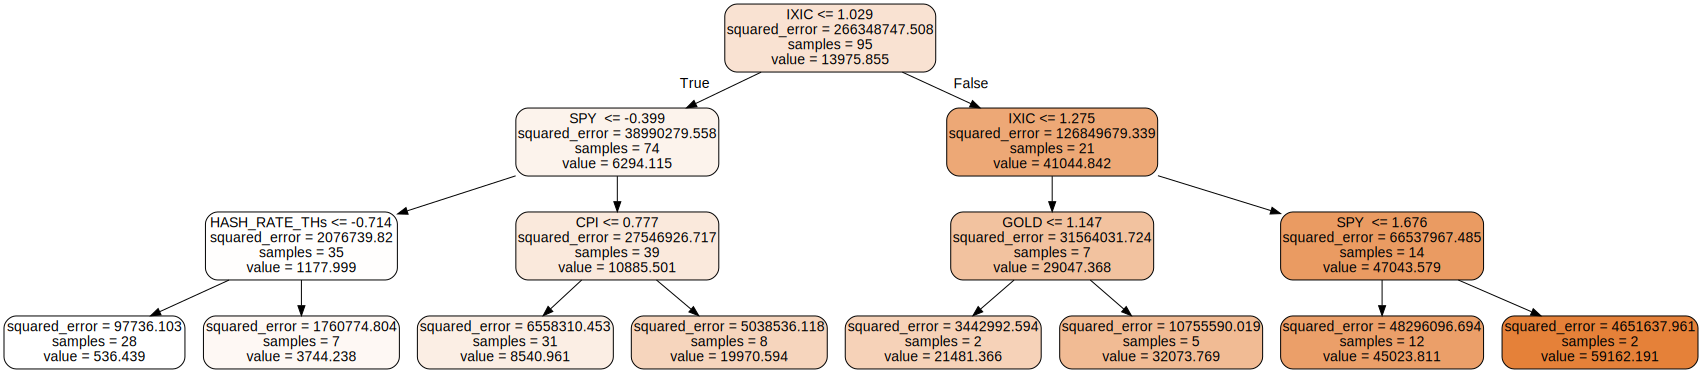

In [71]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg_pipe.named_steps['tree_reg'],
        out_file=str(IMAGES_PATH / "tree.dot"),  
        feature_names=X_train.columns,
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file(IMAGES_PATH / "tree.dot")  

max_deph arriba de 3 crea overfitting en el modelo, en la imagen vemos como se ramifica a partir de IXIC(NASDAQ) era de esperarse siendo el parametro que mas correlacion posee con Bitcoin.

Es muy parecido a clasificacion  pero en lugar de predecir una clase predice un valor en este caso el precio de Bitcoin, las predicciones funcionan en ir de un nodo al otro y cuenta cuantas veces aparecen las instancias en el entrenamiento (Samples), el algotmo divide cada region de una manera que hace que la mayoria de las instancias de entrenamiento se acerquen la mas posible a ese valor.

# Aprendizaje conjunto (Ensemble Learning)

Si se agrega un grupo de predictores ya sea clasificación o regresión a menudo se obtiene mejores predicciones que con el mejor predictor individual, un grupo de predictores se llama aprendizaje conjunto (Ensemble Learning). Es el principio de Random Forest que es una agrapacion de Arboles de decision en conjunto que se agrupan para tener un mejor resultado predictorio.

<img src="./images/Factores_BTC/Blank diagram.png">

In [72]:
from sklearn.ensemble import VotingRegressor

sgd_reg_pipe=Pipeline([('prep',preproceso),
                       ('sgd_reg',SGDRegressor(max_iter=100000,# numero de iteraciones
                                              tol=1e-5,# stop criterio cuando (loss>best_loss-tol)
                                              n_iter_no_change=25,# parar si no hay cambio en 50 iteraciones 
                                              random_state=42))])

sgd_pipe_gscv=Pipeline([('preproceso',preproceso),
                   ('sgd',SGDRegressor(max_iter=1000000,eta0=0.01, # optimizado con GridSearchCV
                                       learning_rate='constant',
                                       n_iter_no_change=25,
                                       tol=1e-5,
                                       random_state=42))])

tree_reg_pipe=Pipeline([('prep',preproceso),
                       ('tree_reg',DecisionTreeRegressor(max_depth=3 # regulariza previene overfit
                                                         ,random_state=42))])


voting_reg=VotingRegressor(estimators=[('lr',lin_reg_pipe),('sgd',sgd_pipe_gscv),('tree',tree_reg_pipe)],
                          n_jobs=-1# todos los CPU disponibles
                          )


In [73]:
voting_reg.fit(X_train,y_train)

VotingRegressor(estimators=[('lr',
                             Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<ufunc 'log'>,
                                                                                                                    inverse_func=<ufunc 'exp'>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e10...
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<ufunc 'log'>,
                                                                                                                    inverse_func=<ufunc 'exp'>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e1033d30>)])),
                                             ('tree_reg',
                                              DecisionTreeRegressor(max_depth=3,
                                                                    random_state=42))]))],
                n_jobs=-1)

In [74]:
voting_pred=voting_reg.predict(X_test)
voting_pred

array([ 8677.08123448, 11865.28611467,  3292.2612516 , 12284.76001512,
       31212.58848166,  5128.06789438])

In [75]:
voting_score_train=voting_reg.score(X_train,y_train)
voting_score_train

0.9348688275379972

In [76]:
voting_score_test=voting_reg.score(X_test,y_test)
voting_score_test

0.9330393758435359

In [77]:
voting_df_pred=pd.DataFrame({'predictions':voting_pred,'y':y_test })
voting_df_pred

,predictions,y
Date,,
2018-03-01,8677.081234,6973.529785
2020-06-01,11865.286115,9137.993164
2015-07-01,3292.261252,284.649994
2020-01-01,12284.760015,9350.529297
2020-12-01,31212.588482,29001.720703
2017-08-01,5128.067894,4703.390137


In [78]:
scores_df=pd.DataFrame({'Scores Train':[lr_score_train,sgd_score_train,tree_score_train,voting_score_train],
                        'Scores Test':[lr_score_test,sgd_score_test,tree_score_test,voting_score_test] },
                       index=['Linear Regressor','SGD','Decision Tree','Voting Regressor'])
scores_df

,Scores Train,Scores Test
Linear Regressor,0.895936,0.819134
SGD,0.894206,0.839795
Decision Tree,0.964107,0.971871
Voting Regressor,0.934869,0.933039


Se puede observar que el modelo voting es mejor que muchos de los modelos individuales, excepto decision tree es uno de los mejores modelos junto con random forest, los veremos mas adelante

## Bagging Regressor and Pasting

Bagging Regressor usa el enfoque de utilizar el mismo modelo pero entrenarlos en diferentes conjuntos aleatorios en el entrenamiento, cuando la muestra en el entrenamiento se remplaza el metodo se llama bagging, cuando la muestra en el entrenamiento no se remplaza se llama pasting.

In [79]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg=BaggingRegressor(DecisionTreeRegressor(), # tipo de modelo
                         n_estimators=50000, # 50000 arboles de decisiones 
                         max_samples=60, # 60 muestras aleatorias del training set
                         n_jobs=-1, # todos los CPU disponibles
                         oob_score=True, # out-of-bag para predicciones justas
#                         bootstrap_features=True,#aumenta la velocida de entrenamiento,uso en imagenes, decae la precision, opcional
#                         max_features=0.5,# aumenta velocidad de entrenamiento pero decae precision, opcional 
                         random_state=42)
bag_reg.fit(X_train,y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=60,
                 n_estimators=50000, n_jobs=-1, oob_score=True,
                 random_state=42)

Es muy parecido al Hard Voting, si vemos hemos creado 50,000 arboles de decision que se entrenan de manera aleatoria cuyo resultado en conjunto mejora el aprendizaje. el principio de Random Forest veremos que los resultados son similares.

In [80]:
pred=bag_reg.predict(X_test)
pred

array([ 8574.86947217, 10767.41040474,   351.67959407,  8712.21431555,
       35769.24822693,  3525.74301065])

In [81]:
# El modelo es posible que alcance este nivel de precision 
bag_reg.oob_score_

0.9144423963027826

In [82]:
# precision del modelo en entrenamiento 
b_score_train=bag_reg.score(X_train,y_train)
b_score_train

0.97610771481531

In [83]:
# precision del modelo 
b_score_test=bag_reg.score(X_test,y_test)
b_score_test

0.8930347164918035

In [84]:
# Data frame predicciones y datos reales
bag_reg_df=pd.DataFrame({'predictions':pred,'y':y_test })
bag_reg_df

,predictions,y
Date,,
2018-03-01,8574.869472,6973.529785
2020-06-01,10767.410405,9137.993164
2015-07-01,351.679594,284.649994
2020-01-01,8712.214316,9350.529297
2020-12-01,35769.248227,29001.720703
2017-08-01,3525.743011,4703.390137


### Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor
rndf_reg=RandomForestRegressor(n_estimators=50000,
                               max_leaf_nodes=16,
                               n_jobs=-1,
                               oob_score=True, # out-of-bag para predicciones justas
                               random_state=42
                              )
rndf_reg.fit(X_train,y_train)


RandomForestRegressor(max_leaf_nodes=16, n_estimators=50000, n_jobs=-1,
                      oob_score=True, random_state=42)

In [86]:
y_pred_rndf=rndf_reg.predict(X_test)
y_pred_rndf

array([ 8817.74698588, 10477.08617551,   561.02298943,  8916.09285824,
       36557.9816785 ,  3321.18012664])

In [87]:
rndf_reg.oob_score_ #espectativa de las predicciones, por encima es optimista el modelo, por debajo pesimista

0.9111350213014423

In [88]:
# precision del modelo en entrenamiento 
rndf_score_train=rndf_reg.score(X_train,y_train)
rndf_score_train

0.9864781282401303

In [89]:
# precision del modelo 
randf_score_test=rndf_reg.score(X_test,y_test)
randf_score_test

0.8694423141588291

In [90]:
scores_df_rnd_dt=pd.DataFrame({'Scores Train':[rndf_score_train,b_score_train],
                        'Scores Test':[rndf_score_train,b_score_train] },
                       index=['Random Forest','Bagging Decision Tree'])
scores_df_rnd_dt

,Scores Train,Scores Test
Random Forest,0.986478,0.986478
Bagging Decision Tree,0.976108,0.976108


Los resultados son similiares, Random Forest esta optimizado para hacer mejores predicciones.

In [91]:
# Caracteristicas de Importancia en Random Forest Regressor
# Que variable o columnda de datos es la mas utilizada
# La suma de resultados es igual a 1

for score, name in zip (rndf_reg.feature_importances_,X_train.columns):
    print(round(score,2),name)
# Se puede decir que IXIC (Nasdaq) es la caracteristica mas importante con 71%

0.13 SPY 
0.06 DJI
0.75 IXIC
0.01 GOLD
0.01 DXY
0.01 IR_TLT_10YR
0.01 C_SENT
0.01 CPI
0.01 HASH_RATE_THs


## ADABOOST

Boosting se refiere a cualquier ensamblaje que combina modelos debiles en modelos fuertes, entrena los predictores en secuencia. Adaptative Boosting (Adaboost) y gradient boost son de los mas utilizados.


Toma varios minutos para que el modelo se entrene

In [92]:
# ADABOOST
# El entrenamiento no puede ser parado el resultado no escala tan bien como bagging or passting

from sklearn.ensemble import AdaBoostRegressor

ada_reg=AdaBoostRegressor(RandomForestRegressor(n_jobs=-1),
                          n_estimators=500, # cantidad de random forest en cadena 
                          learning_rate=0.01,
                          loss='linear',
                          random_state=42
                         )
ada_reg.fit(X_train,y_train)



AdaBoostRegressor(estimator=RandomForestRegressor(n_jobs=-1),
                  learning_rate=0.01, n_estimators=500, random_state=42)

In [93]:
ada_reg.predict(X_test)

array([ 8713.26569114, 10949.59097676,   385.46205493,  8647.25870622,
       34305.52626956,  3674.06352056])

In [94]:
ada_reg.score(X_train,y_train)

0.9978129177427807

In [95]:
ada_reg.score(X_test,y_test)


0.9270868483318861

El modelo Adaboost posee la mejor precision hasta el momento 0.99 para entrenamiento y 0.94 para test

In [96]:
ada_pred=ada_reg.predict(X_test)
ada_pred

array([ 8713.26569114, 10949.59097676,   385.46205493,  8647.25870622,
       34305.52626956,  3674.06352056])

In [97]:
ada_pred_df=pd.DataFrame({'predictions':ada_pred,'y':y_test })
ada_pred_df

,predictions,y
Date,,
2018-03-01,8713.265691,6973.529785
2020-06-01,10949.590977,9137.993164
2015-07-01,385.462055,284.649994
2020-01-01,8647.258706,9350.529297
2020-12-01,34305.526270,29001.720703
2017-08-01,3674.063521,4703.390137


## Gradient Boosting Regressor

Toma unos minutos para que el modelo se entrene

In [98]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(n_estimators=500, # cantidad de regresiones en cadena 
                              learning_rate=0.1,
                              n_iter_no_change=9, # para cuando no mejora en N arboles (10), N> overfit <N underfit
                              random_state=42)
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=500, n_iter_no_change=9, random_state=42)

In [99]:
gbrt_pred=gbrt.predict(X_test)
gbrt_pred

array([ 9834.87200482, 10357.38607721,   546.31176009,  8546.03307248,
       32185.49836958,  3520.69161946])

In [100]:
gbrt.score(X_train,y_train)

0.9970116382264794

In [101]:
gbrt.score(X_test,y_test)

0.9555976028353885

In [102]:
gbrt.n_estimators_

52

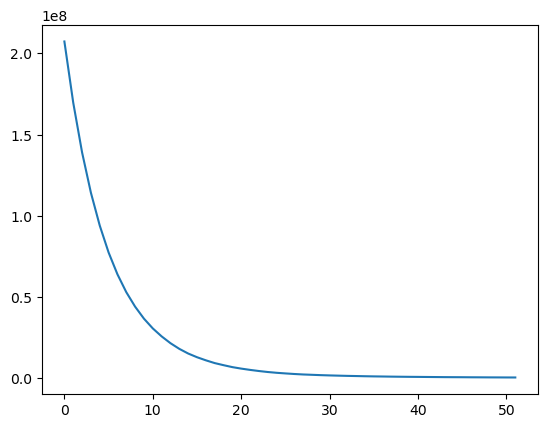

In [103]:
plt.plot(gbrt.train_score_);


In [104]:
gdb_pred_df=pd.DataFrame({'predictions':gbrt_pred,'y':y_test })
gdb_pred_df

,predictions,y
Date,,
2018-03-01,9834.872005,6973.529785
2020-06-01,10357.386077,9137.993164
2015-07-01,546.311760,284.649994
2020-01-01,8546.033072,9350.529297
2020-12-01,32185.498370,29001.720703
2017-08-01,3520.691619,4703.390137


## Stacking Regressor

In [105]:
from sklearn.ensemble import StackingRegressor

sgd_reg_pipe=Pipeline([('prep',preproceso),
                       ('sgd_reg',SGDRegressor(max_iter=100000,# numero de iteraciones
                                              tol=1e-5,# stop criterio cuando (loss>best_loss-tol)
                                              n_iter_no_change=25,# parar si no hay cambio en 50 iteraciones 
                                              random_state=42))])

sgd_pipe_gscv=Pipeline([('preproceso',preproceso),
                   ('sgd',SGDRegressor(max_iter=1000000,eta0=0.01, # optimizado con GridSearchCV
                                       learning_rate='constant',
                                       n_iter_no_change=25,
                                       tol=1e-5,
                                       random_state=42))])

tree_reg_pipe=Pipeline([('prep',preproceso),
                       ('tree_reg',DecisionTreeRegressor(max_depth=3 # regulariza previene overfit
                                                         ,random_state=42))])


stacking_reg=StackingRegressor(estimators=[('lr',lin_reg_pipe),
                                       ('sgd',sgd_pipe_gscv),
                                       ('tree',tree_reg_pipe)],
                             final_estimator=rndf_reg,
                             n_jobs=-1# todos los CPU disponibles
                          )

In [106]:
stacking_reg.fit(X_train,y_train)


StackingRegressor(estimators=[('lr',
                               Pipeline(steps=[('prep',
                                                ColumnTransformer(transformers=[('pipeline',
                                                                                 Pipeline(steps=[('functiontransformer',
                                                                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                      func=<ufunc 'log'>,
                                                                                                                      inverse_func=<ufunc 'exp'>)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e...
                                                                                                                      func=<ufunc 'log'>,
                                                                                                                      inverse_func=<ufunc 'exp'>)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9e1033d30>)])),
                                               ('tree_reg',
                                                DecisionTreeRegressor(max_depth=3,
                                                                      random_state=42))]))],
                  final_estimator=RandomForestRegressor(max_leaf_nodes=16,
                                                        n_estimators=50000,
                                                        n_jobs=-1,
                                                        oob_score=True,
                                                        random_state=42),
                  n_jobs=-1)

In [107]:
stacking_reg.score(X_train,y_train)

0.9430515157149161

In [108]:
stacking_reg.score(X_test,y_test)

0.8747276493398634

## Multi-Layer Perceptron Regressor

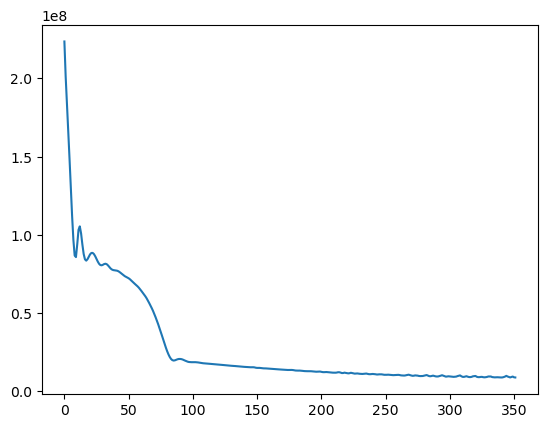

In [109]:
from sklearn.neural_network import MLPRegressor

mlr_model = MLPRegressor(hidden_layer_sizes=(512,256,128,64,32,16),
                         solver='adam',
                         learning_rate='adaptive',
                         random_state=42,
                         max_iter = 10000,
                         activation='relu',
                         alpha=0.0001,
                         n_iter_no_change=10,
                         verbose=0)
mlr_model.fit(X_train,y_train)
plt.plot(mlr_model.loss_curve_);



In [110]:
mlr_train_score=mlr_model.score(X_train,y_train)
mlr_train_score

0.9308253369232959

In [111]:
mlr_test_score=mlr_model.score(X_test,y_test)
mlr_test_score

0.9546749628790928

In [112]:
pred_mlr=mlr_model.predict(X_test)
pred_mlr

array([ 7977.23108794, 12106.64216578,   876.17839366,  8762.41641106,
       32358.57748492,  3931.30530373])

In [113]:
mlr_pred_df=pd.DataFrame({'predictions':pred_mlr,'y':y_test })
mlr_pred_df

,predictions,y
Date,,
2018-03-01,7977.231088,6973.529785
2020-06-01,12106.642166,9137.993164
2015-07-01,876.178394,284.649994
2020-01-01,8762.416411,9350.529297
2020-12-01,32358.577485,29001.720703
2017-08-01,3931.305304,4703.390137


In [115]:
from sklearn.model_selection import cross_validate


cv_ada_reg=cross_validate(ada_reg,X_train,y_train,
                          n_jobs=-1,
                          return_train_score=True,
                          scoring=('r2', 'neg_mean_squared_error'),
                          cv=10,
                          verbose=1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.9min finished


In [116]:
cv_ada_reg

{'fit_time': array([304.32012987, 302.81771994, 303.95301604, 305.05932403,
        304.47519898, 304.85142708, 309.84935904, 305.29509783,
        305.15303302, 304.30322361]),
 'score_time': array([21.46116805, 21.422194  , 21.11413407, 20.98186994, 20.98689198,
        21.16521382, 20.90848875, 20.69910216, 20.53924894, 20.60985231]),
 'test_r2': array([0.87249979, 0.9152565 , 0.95611848, 0.87646077, 0.73428371,
        0.91374641, 0.97595249, 0.97165932, 0.5779065 , 0.87125634]),
 'train_r2': array([0.99749777, 0.99748892, 0.99781967, 0.99782624, 0.99765578,
        0.99767698, 0.99739135, 0.99757485, 0.99785766, 0.99822968]),
 'test_neg_mean_squared_error': array([-36523258.05887333, -17648760.1997961 , -15980486.64168538,
        -23834739.84159449,  -6473121.2709807 , -45505363.14199163,
         -4574442.15487972,  -6864539.50277423, -27198579.88872517,
        -41130746.60634866]),
 'train_neg_mean_squared_error': array([-654476.86292241, -685982.09087623, -547062.49325117,
  

In [117]:
# muestra los CV 
cv_ada_reg['train_r2']

array([0.99749777, 0.99748892, 0.99781967, 0.99782624, 0.99765578,
       0.99767698, 0.99739135, 0.99757485, 0.99785766, 0.99822968])